<a href="https://colab.research.google.com/github/varunposimsetty/FFT/blob/DFT_Python/DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install seaborn
!pip install pydub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import wave
from pydub import AudioSegment
from scipy.io.wavfile import read as read_audio

In [18]:
def my_dft(x):
  start_time = time.time()
  N = len(x)
  X = []
  Magnitude = []
  Phase = []
  twiddle = np.zeros((N,N),dtype=complex)
  for m in range(0,N):
    X_m = 0
    for n in range(0,N):
      twiddle[m,n] = np.exp(-2j*np.pi*m*n/N)
      X_m += twiddle[m,n] * x[n]
    X.append(X_m)
    Magnitude.append(np.abs(X_m))
    Phase.append(np.angle(X_m))
  end_time = time.time()
  print("Time taken: ", end_time - start_time)
  return X, Magnitude, Phase



In [19]:
x = np.array([0.79, 0.12, -0.86, 0.54, -0.32, -0.98, 0.21, 1.05, -0.67, 0.43, 0.91, -0.18, -0.75, 0.39, 0.62, -0.47, -1.12, 0.08, 0.83, -0.59, -0.25, 0.95, -0.71, 0.35, 1.09, -0.63, -0.41, 0.58, 0.74, -0.29, -0.92, 0.16, 1.01, -0.79, 0.31, 0.87, -0.55, -0.37, 0.66, 0.81, -0.23, -1.06, 0.10, 0.97, -0.75, 0.27, 0.83, -0.61, -0.49, 0.54, 0.70, -0.33, -0.88, 0.20, 1.13, -0.83, 0.23, 0.79, -0.67, -0.45, 0.50, 0.66, -0.37, -0.84, 0.24, 1.07])
N = len(x)
X, Magnitude, Phase = my_dft(x)
print("X: ", X)
print("Magnitude: ", Magnitude)
print("Phase: ", Phase)

Time taken:  0.03620171546936035
X:  [(3.3600000000000003+0j), (-0.14322764417557265+0.35903497726585215j), (1.3843884986107338+0.3758818124863895j), (0.4296430362685242-0.5108690065212818j), (-0.8496017300004115+0.07293996982612388j), (0.4764553742113823+3.461221346994661j), (3.573838607150925+0.5742635496196726j), (3.470103140536482+1.6142311467661183j), (1.9321905537359756+0.17946053428920916j), (2.1790226404028066-0.17501339713780806j), (3.0003471538886917-0.125168439535431j), (0.7300000000000044-2.8405633244129445j), (6.759527713582421-0.4125773378454193j), (-2.419119718505373+5.959815919894982j), (4.1193414870395495+4.053859749795345j), (2.8186901737638643-0.9959646686019257j), (-2.254699591912654+2.3131744491569073j), (2.5761783116766646+8.34038457683031j), (-13.603631750041899+13.407627955401924j), (9.728560689584446-3.932655035188878j), (3.344855921023306-5.457669667243845j), (1.7703570509376518-1.3195579222348477j), (4.139999999999986-1.437602170282167j), (3.289908610044893-3

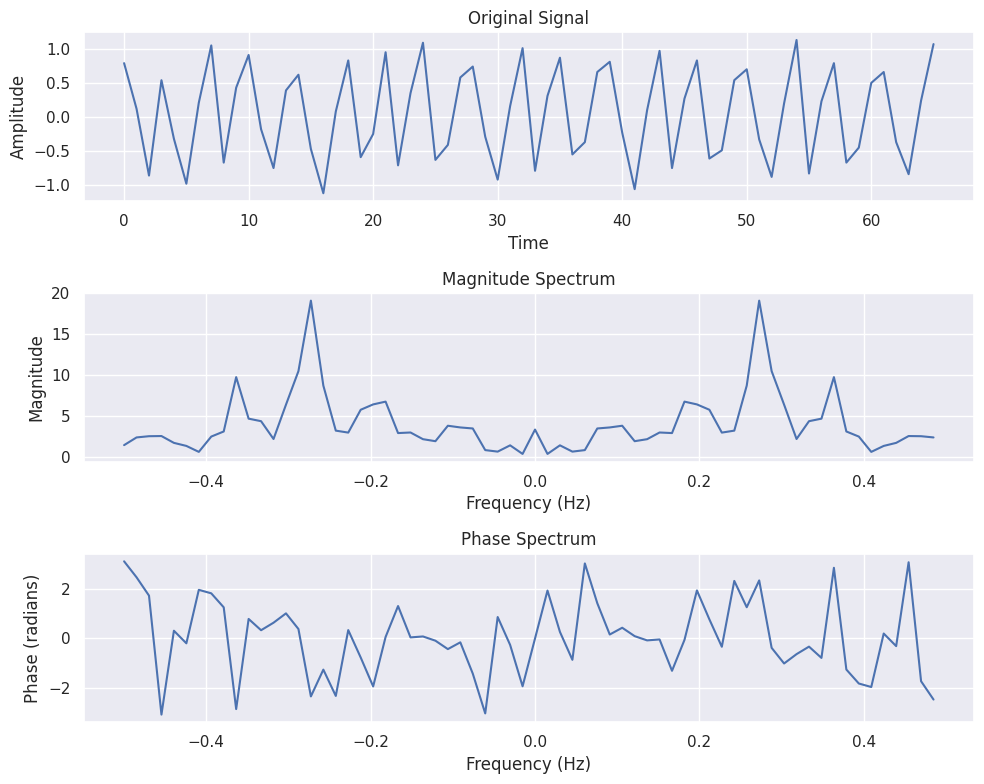

In [20]:
fs = 1
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x=range(N), y=x, ax=ax1)
ax1.set_title("Original Signal")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude, ax=ax2)
ax2.set_title("Magnitude Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase, ax=ax3)
ax3.set_title("Phase Spectrum")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

In [26]:
audio = AudioSegment.from_file("Music_1.mp3", format="mp3")
audio.export("Music_1.wav", format="wav")
filename = "Music_1.wav"
sampling_rate, audio_signal = read_audio(filename)
print(f"Sampling Rate: {sampling_rate}")
print(f"Audio Signal Length: {len(audio_signal)}")
audio_signal = audio_signal/np.max(np.abs(audio_signal))


Sampling Rate: 44100
Audio Signal Length: 11139072


In [27]:
x = audio_signal[:2048]
N = len(x)
X, Magnitude, Phase = my_dft(x)
print("X: ", X)
print("Magnitude: ", Magnitude)
print("Phase: ", Phase)

Time taken:  10.485038042068481
X:  [(0.20529482551143233+0j), (-0.06656557366565734+0.20034307867969628j), (-0.41505841008618255+0.4057653477715815j), (-0.5428743245434476+0.5013328138677859j), (-0.42204578142059396-0.15349507949199145j), (-0.2063919559684261-0.31855475218003115j), (0.07569048028033393-0.3111087529324581j), (0.30333913919717675-0.12310459073457616j), (0.1631167871042404+0.06794000664704983j), (-0.015294336715153985+0.15970048765960548j), (-0.12831275608133855-0.018338940147850084j), (-0.10168122027235689-0.06169911824113853j), (-0.0027483703566604893-0.13117203708023095j), (0.07557315486970932-0.05653796146290785j), (0.042103739525884955-0.03746846356196269j), (-0.012313223143964958-0.013168671887656316j), (-0.025822304148635625-0.041524776154502896j), (-0.029638217172263854-0.06911991309589828j), (0.04372674751652893-0.05580855920628369j), (0.04533703331367823-0.01445285544323125j), (0.03998153996569995-0.004073128944914963j), (-0.0015801562487719138+0.00545898286883

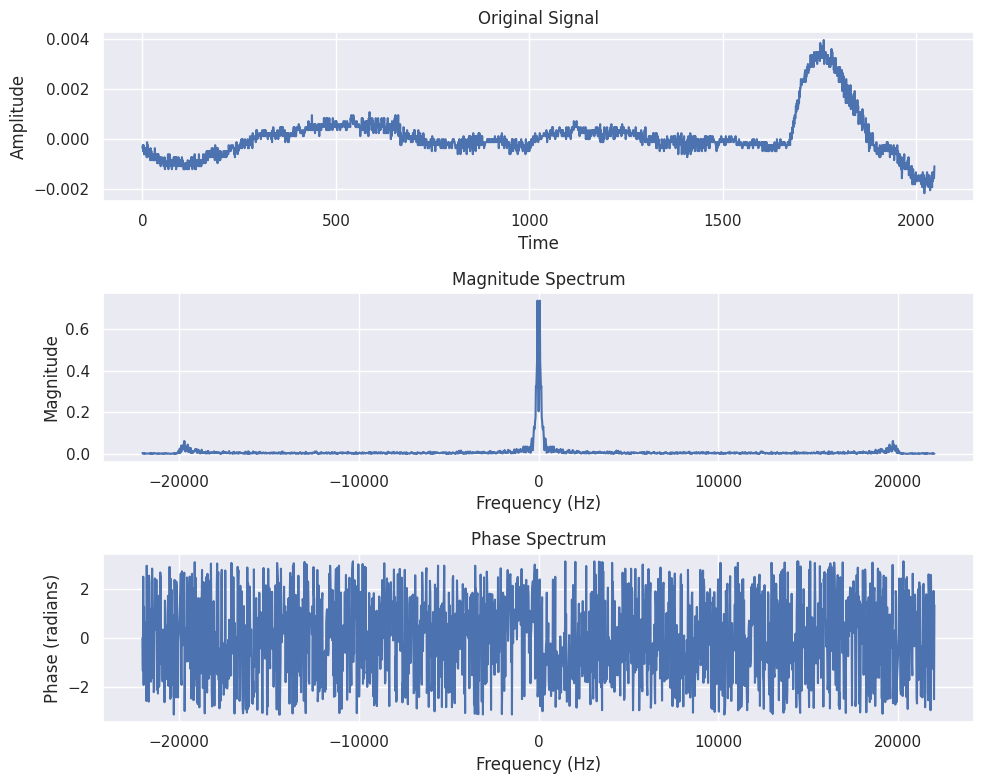

In [28]:
fs = sampling_rate
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
sns.lineplot(x=range(N), y=x, ax=ax1)
ax1.set_title("Original Signal")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude, ax=ax2)
ax2.set_title("Magnitude Spectrum")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase, ax=ax3)
ax3.set_title("Phase Spectrum")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

Stereo Data

In [29]:
audio = AudioSegment.from_file("Music_2.mp3", format="mp3")
audio.export("Music_2.wav", format="wav")
filename = "Music_2.wav"
sampling_rate, audio_signal = read_audio(filename)
print(f"Sampling Rate: {sampling_rate}")
print(f"Audio Signal Length: {len(audio_signal)}")
audio_signal = audio_signal/np.max(np.abs(audio_signal))
left_channel = audio_signal[:, 0]
right_channel = audio_signal[:, 1]


Sampling Rate: 44100
Audio Signal Length: 8145792


Time taken:  9.985692024230957
Time taken:  8.200479745864868


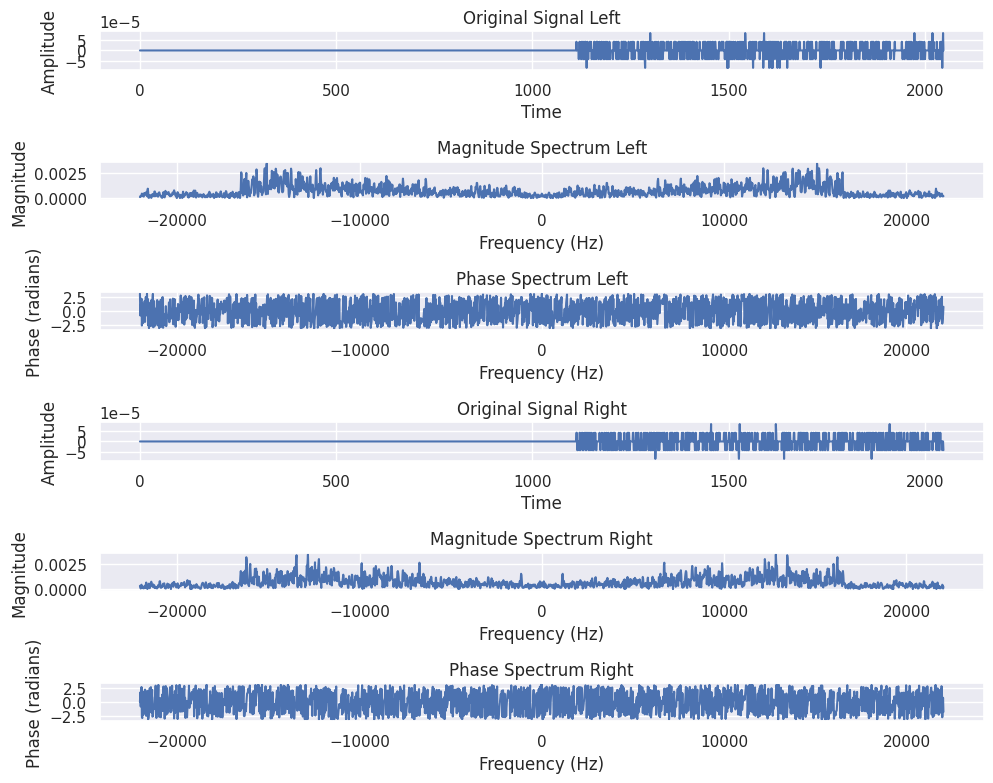

In [36]:
X_left, Magnitude_left, Phase_left = my_dft(left_channel[:2048])
X_right, Magnitude_right, Phase_right = my_dft(right_channel[:2048])
N = len(left_channel[:2048])
fs = sampling_rate
frequencies = np.fft.fftfreq(N, 1/fs)
sns.set_theme(style="darkgrid")
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10, 8))


sns.lineplot(x=range(N), y=left_channel[:N], ax=ax1)
ax1.set_title("Original Signal Left")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude_left, ax=ax2)
ax2.set_title("Magnitude Spectrum Left")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase_left, ax=ax3)
ax3.set_title("Phase Spectrum Left")
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Phase (radians)")


sns.lineplot(x=range(N), y=right_channel[:N], ax=ax4)
ax4.set_title("Original Signal Right")
ax4.set_xlabel("Time")
ax4.set_ylabel("Amplitude")

sns.lineplot(x=frequencies, y=Magnitude_right, ax=ax5)
ax5.set_title("Magnitude Spectrum Right")
ax5.set_xlabel("Frequency (Hz)")
ax5.set_ylabel("Magnitude")

sns.lineplot(x=frequencies, y=Phase_right, ax=ax6)
ax6.set_title("Phase Spectrum Right")
ax6.set_xlabel("Frequency (Hz)")
ax6.set_ylabel("Phase (radians)")

plt.tight_layout()
plt.show()